# INF200 Lecture No Ju08
### Hans Ekkehard Plesser / NMBU
### 16 June 2023

## Today's topics

- Focus for remaining days
- Example dynamics for `check_sim.py` and `sample_sim.py` 

-------

# Focus for remaining days

- Key agile steps
    1. Make it run
    2. Make it right
    3. Make it fast

## 1. Make it run

### Code

1. Simulation can be constructed with `BioSim()` constructor and run with `simulate()`
2. `check_sim.py` runs (even if it ignores given geography and just runs a single cell and produces output in text form)
3. (Almost) all `test_biosim_interface.py` tests pass
4. Herbivores and carnivores in single cell with plot of animal numbers (if dynamics are wrong, ignore at this stage)
5. Migration
6. Visualisation with heat maps
7. Visualisation with histograms

### Packaging

1. `setup.cfg`, `setup.py`, `tox.ini`, `pyproject.toml` in place, based on BioLab example
1. Running `tox` runs your tests (even if some fail)

### Tests

1. Some tests of your own can be run with Pytest

### Documentation

1. Minimal Sphinx configuration that includes docstrings using `automodule`

## 2. Make it right

### Code

1. All `flake8` tests pass
1. Code works correctly (results similar to reference solutions)
1. Good variable and method names
1. "Dead code" removed

### Tests

1. Good test coverage
1. More powerful tests (e.g. statistical tests)

### Documentation

1. Texts explaining your code and how to use it
1. Good docstrings


## 3. Make it fast (and polished)

### Code

1. Optimized code
1. Elegant solutions
1. Additional features
1. All code thoroughly tidied up

### Tests

1. Very high test coverage

### Documentation

1. Extensive tutorial materials with illustrations and examples
1. Very well worked through docstrings


-----------

# Example dynamics for `check_sim` and `sample_sim`

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def load(path):
    data = []
    for logfile in path.glob('*.csv'):
        d = pd.read_csv(logfile, skiprows=1, usecols=[0, 1, 2], index_col=0,
                        names=['Year', 'Herbivores', 'Carnivores'])
        d['Seed'] = int(logfile.stem.split('_')[1])
        data.append(d)
    hd = pd.concat(data).pivot(columns='Seed')
    return hd

## check_sim

- 20 runs with different seeds of `reference_examples/check_sim.py`

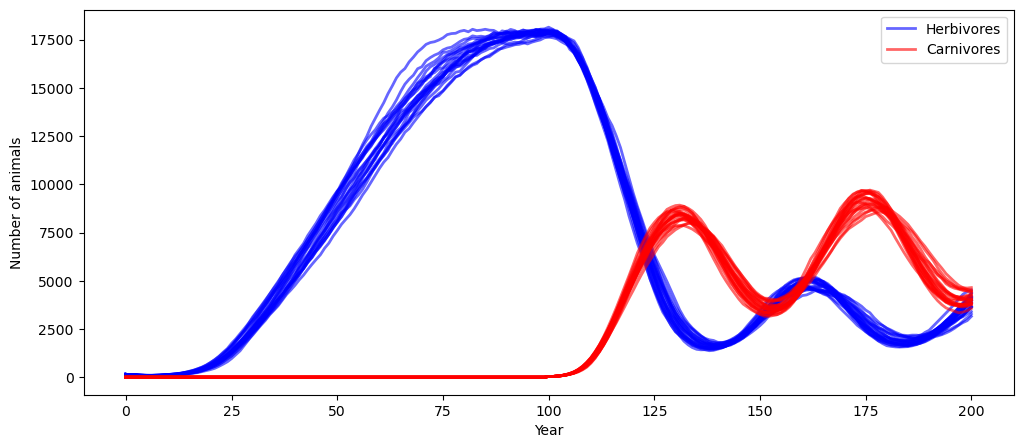

In [3]:
check = load(Path('../../../inf200-biosim-june-2023/examples/samcheck'))
plt.figure(figsize=(12, 5))
hl = plt.plot(check.Herbivores, 'b', alpha=0.6, lw=2);
cl = plt.plot(check.Carnivores, 'r', alpha=0.6, lw=2);
hl[0].set_label('Herbivores');
cl[0].set_label('Carnivores');
plt.legend();
plt.xlabel('Year');
plt.ylabel('Number of animals');

| ![1](../../../inf200-biosim-june-2023/examples/samcheck/s00100_00001.png) | ![1](../../../inf200-biosim-june-2023/examples/samcheck/s00101_00001.png) | ![1](../../../inf200-biosim-june-2023/examples/samcheck/s00102_00001.png) |
| -- | -- | -- |
| ![1](../../../inf200-biosim-june-2023/examples/samcheck/s00103_00001.png) | ![1](../../../inf200-biosim-june-2023/examples/samcheck/s00104_00001.png) | ![1](../../../inf200-biosim-june-2023/examples/samcheck/s00105_00001.png) |
| ![1](../../../inf200-biosim-june-2023/examples/samcheck/s00106_00001.png) | ![1](../../../inf200-biosim-june-2023/examples/samcheck/s00107_00001.png) | ![1](../../../inf200-biosim-june-2023/examples/samcheck/s00108_00001.png) | 


## sample_sim

- 20 runs of `reference_examples/sample_sim.py` with different seeds
- Time when animal numbers grow beyond 5000 varies strongly depending on whether animals manage to cross desert in the north

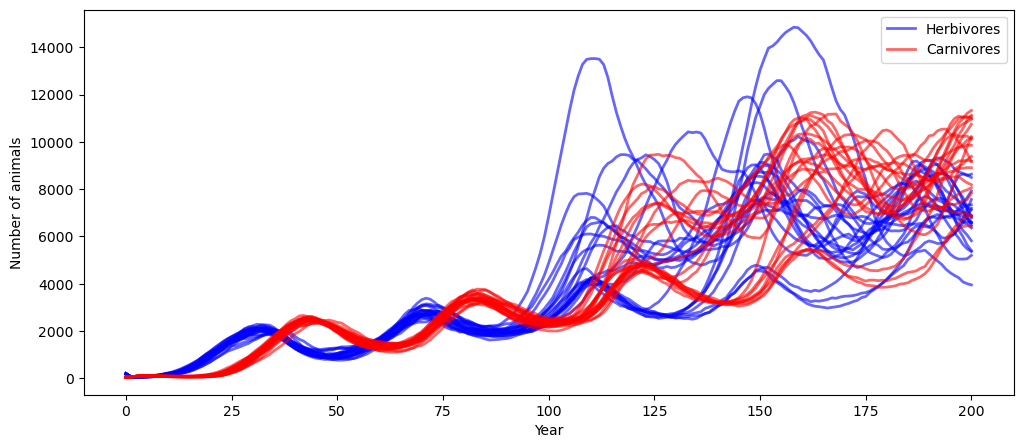

In [5]:
sample = load(Path('../../../inf200-biosim-june-2023/examples/samsim'))
plt.figure(figsize=(12, 5))
hl = plt.plot(sample.Herbivores, 'b', alpha=0.6, lw=2);
cl = plt.plot(sample.Carnivores, 'r', alpha=0.6, lw=2);
hl[0].set_label('Herbivores');
cl[0].set_label('Carnivores');
plt.legend();
plt.xlabel('Year');
plt.ylabel('Number of animals');

| ![1](../../../inf200-biosim-june-2023/examples/samsim/s00100_00002.png) | ![1](../../../inf200-biosim-june-2023/examples/samsim/s00101_00002.png) | ![1](../../../inf200-biosim-june-2023/examples/samsim/s00102_00002.png) |
| -- | -- | -- |
| ![1](../../../inf200-biosim-june-2023/examples/samsim/s00103_00002.png) | ![1](../../../inf200-biosim-june-2023/examples/samsim/s00104_00002.png) | ![1](../../../inf200-biosim-june-2023/examples/samsim/s00105_00002.png) |
| ![1](../../../inf200-biosim-june-2023/examples/samsim/s00106_00002.png) | ![1](../../../inf200-biosim-june-2023/examples/samsim/s00107_00002.png) | ![1](../../../inf200-biosim-june-2023/examples/samsim/s00108_00002.png) | 
